In [5]:
"""
Logistic Growth Model Example

This example demonstrates how to model logistic growth using PyBiodynamics.

The logistic growth equation is: dx/dt = r*x*(1 - x/K)
where r is the intrinsic growth rate and K is the carrying capacity.
"""

import numpy as np
import matplotlib.pyplot as plt
from pybiodynamics import (
    Species, Parameter, SystemModel, 
    MassActionReaction,
    simulate_ode, run_gillespie_simulation
)



In [6]:

"""Create a logistic growth model using two MassActionReaction objects."""
model = SystemModel("Logistic Growth (Mass Action)")

# Define species and parameters
population = Species('x', initial_condition=10.0, positive=True)
growth_rate = Parameter('r', default_value=0.5, positive=True)
carrying_capacity = Parameter('K', default_value=1000, positive=True)

# Add to model
model.add_species(population) \
        .add_parameter(growth_rate) \
        .add_parameter(carrying_capacity)

# Approximate logistic growth with two reactions:
# 1. Birth: x -> 2x (rate = r * x)
birth_reaction = MassActionReaction(
    name='birth',
    reactants={population: 1},
    products={population: 2},
    rate=growth_rate
)

# 2. Competition/Death: 2x -> 0 (rate = (r/K) * x^2)
# This approximates the -r*x^2/K term in logistic growth
death_rate = growth_rate / carrying_capacity  # This creates a new Parameter
death_reaction = MassActionReaction(
    name='competition_death',
    reactants={population: 2},
    products={},
    rate=death_rate
)

model.add_reaction(birth_reaction) \
        .add_reaction(death_reaction)

SystemModel(name='Logistic Growth (Mass Action)', species=1, parameters=2, reactions=2)

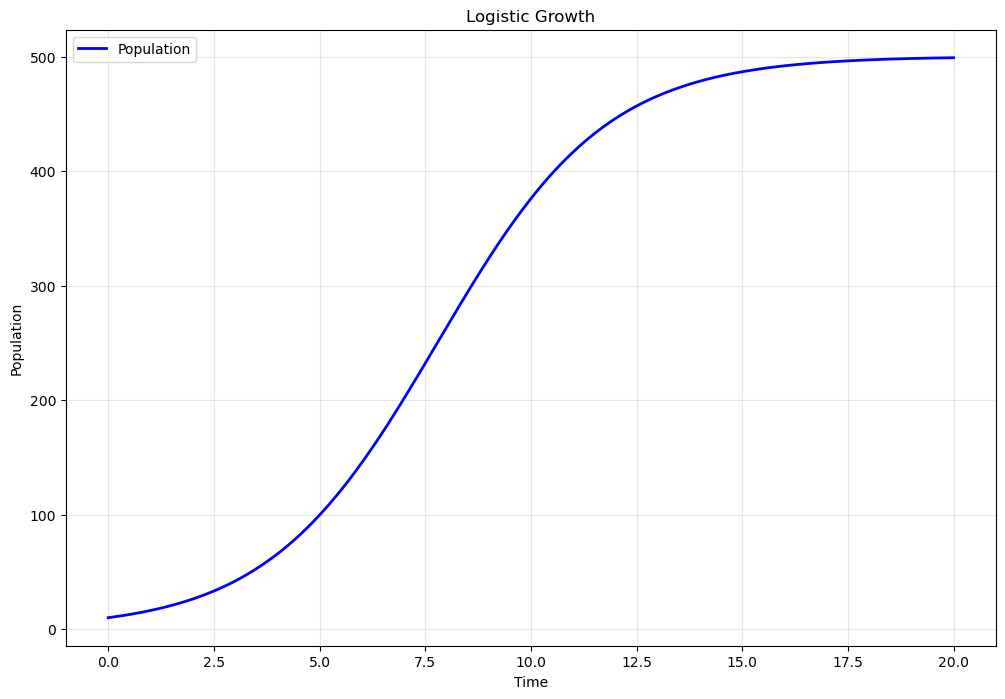

In [7]:

# Simulation parameters
t_span = [0, 20]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Run ODE simulations
result = simulate_ode(model, t_span, t_eval)

# Plot comparison
plt.figure(figsize=(12, 8))

# Specialized model
solution = result['solution']
plt.plot(solution.t, solution.y[0], 'b-', linewidth=2, label='Population')
plt.title('Logistic Growth')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True, alpha=0.3)



Stochastic Logistic Growth Simulation
Running Gillespie simulation for 5,000 iterations...
Simulation completed in 344.08 ms

Simulation Statistics:
+-------------+------------------+----------------------+
| Component   |   Gillespie Mean |   Gillespie Variance |
|-------------+------------------+----------------------|
| x           |          313.051 |              40989.5 |
+-------------+------------------+----------------------+


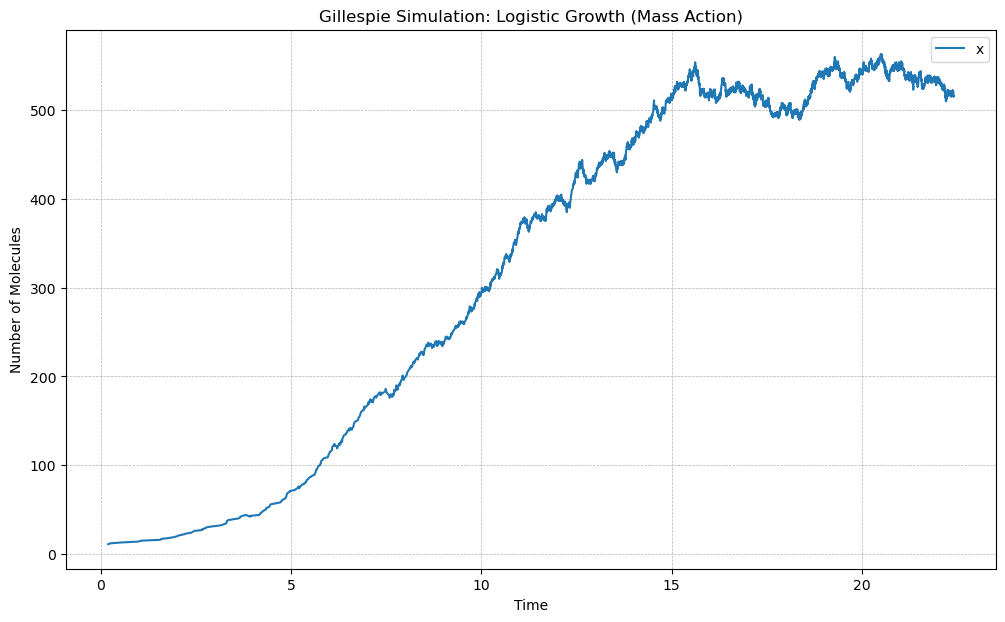

In [10]:


"""Run stochastic simulation of logistic growth."""
print("\nStochastic Logistic Growth Simulation")
print("="*40)


# Run Gillespie simulation
results = run_gillespie_simulation(
    model,
    max_iter=5_000, 
    use_numba=True,
    seed=42,
    plot=True
)




Carrying Capacity Sensitivity Analysis
Testing carrying capacities: [500, 750, 1000, 1250, 1500]


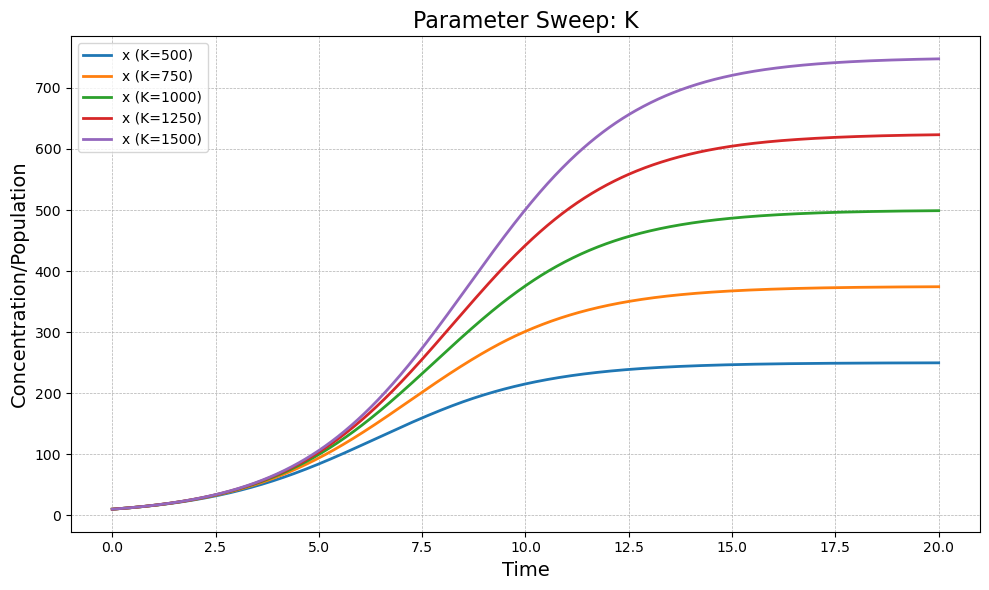

In [11]:


"""Demonstrate how carrying capacity affects growth dynamics."""
print("\nCarrying Capacity Sensitivity Analysis")
print("="*45)

from pybiodynamics.simulation.ode import parameter_sweep

# Create base model

# Test different carrying capacities
K_values = [500, 750, 1000, 1250, 1500]

print(f"Testing carrying capacities: {K_values}")

# Run parameter sweep
results = parameter_sweep(
    model,
    parameter_name='K',
    parameter_values=K_values,
    t_span=[0, 20],
    plot_species=['x']
)




Growth Rate Sensitivity Analysis
Testing growth rates: [0.1, 0.3, 0.5, 0.7, 0.9]


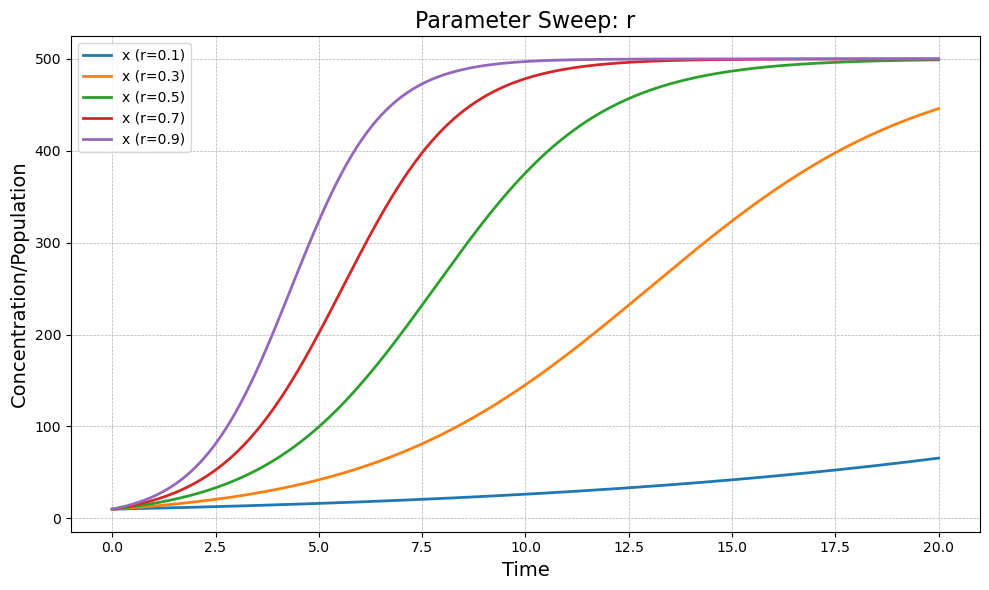

In [12]:


"""Demonstrate how growth rate affects dynamics."""
print("\nGrowth Rate Sensitivity Analysis")
print("="*40)

from pybiodynamics.simulation.ode import parameter_sweep


# Test different growth rates
r_values = [0.1, 0.3, 0.5, 0.7, 0.9]

print(f"Testing growth rates: {r_values}")

# Run parameter sweep
results = parameter_sweep(
    model,
    parameter_name='r',
    parameter_values=r_values,
    t_span=[0, 20],
    plot_species=['x']
)

